In [46]:
from src.FunctionsProperties import *
import matplotlib.pyplot as plt

## Create all_files

In [24]:
# Create folders to Results
make_results_folders()
move_to_data()

In [25]:
# ==> READ DOCUMENTATION OF FUNCTION all_properties_file(N,dim, alpha_a, alpha_g) BEFORE RUN THAT CELL!! <==
N = [5000, 10000, 20000, 40000, 80000, 100000, 160000, 320000, 640000]
#N = [5000]
dim = [1, 2, 3, 4]

for n in N:
    for d in dim:
        all_combinations_ag =  extract_alpha_values(n, d)
        for i in range(len(all_combinations_ag)):
            try:
                # READ DOCUMENTATION BEFORE RUN THAT CELL
                all_properties_file(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
                fixing_data(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
            except FileNotFoundError:
                pass
            #remove_cod_file_column(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
clear_output()

In [26]:
N = [5000, 10000, 20000, 40000, 80000, 100000 ,160000, 320000]
dim = [1, 2, 3, 4]
format_file(N, dim)
all_data(N, dim)

5000 1 8.0 3.0
5000 1 4.0 4.0
5000 1 1.0 9.0
5000 1 2.0 14.0
5000 1 0.0 2.0
5000 1 9.0 3.0
5000 1 36.0 2.0
5000 1 16.0 2.0
5000 1 6.0 8.0
5000 1 5.0 0.0
5000 1 8.0 7.0
5000 1 6.0 6.0
5000 1 0.0 3.0
5000 1 4.0 7.0
5000 1 1.0 4.0
5000 1 7.0 8.0
5000 1 1.0 2.0
5000 1 11.0 2.0
5000 1 2.0 0.1
5000 1 7.0 4.0
5000 1 4.0 8.0
5000 1 6.0 2.0
5000 1 9.0 7.0
5000 1 4.0 9.0
5000 1 2.0 3.0
5000 1 1.0 8.0
5000 1 8.0 5.0
5000 1 5.0 2.0
5000 1 1.5 2.0
5000 1 8.0 2.0
5000 1 14.0 2.0
5000 1 9.0 9.0
5000 1 8.0 0.0
5000 1 8.0 0.1
5000 1 4.0 3.0
5000 1 3.0 1.0
5000 1 8.0 4.0
5000 1 7.0 9.0
5000 1 9.0 0.1
5000 1 21.0 2.0
5000 1 8.0 1.0
5000 1 4.0 2.0
5000 1 8.0 8.0
5000 1 9.0 4.0
5000 1 0.0 5.0
5000 1 4.0 0.1
5000 1 5.0 0.1
5000 1 9.0 5.0
5000 1 7.0 0.0
5000 1 0.0 0.1
5000 1 6.5 2.0
5000 1 4.0 6.0
5000 1 8.0 6.0
5000 1 15.0 2.0
5000 1 7.5 2.0
5000 1 10.0 2.0
5000 1 2.0 4.0
5000 1 2.0 11.0
5000 1 1.0 1.0
5000 1 9.0 1.0
5000 1 9.0 2.0
5000 1 3.0 8.0
5000 1 2.0 6.0
5000 1 8.0 9.0
5000 1 2.0 7.0
5000 1 0.0 0.0
5

# <b> Statistical Analysis </b>

### For some reason, for some sets of parameters ($N$, $dim$, $\alpha_a$, $\alpha_g$) , the values ​​of the assortativity coefficients have a large fluctuation (large STD values), generating averages with a considerably large standard error. With this in mind, it is necessary to perform an analysis and filtering on the data whose sets present these problems.

## <b> Using an absolute approach </b>

### Set absolute bounds for the standard error and standard deviation ($\sigma$), regardless of the measurement, and filter out data that exceed these bounds. In my case, i'll use std for other combinations ($\alpha_g$, $\alpha_a$) where the standard error are smaller 10%, when $N$ and $dim$ are equals. The process is very simple. Given the set $R$ $=$ $[-0.0245503$, $-0.0155637$, $-0.0219698$, $-0.0144903$ $,...]$ and a good value for $\sigma$, $\sigma$ $=$ $\sigma_{ideal}$. Each value outside of range $-\sigma_{ideal}$ $<$ $value$ $<$ $\sigma_{ideal}$ or $value < |\sigma_{ideal}|$ is refused.

In [47]:
# Import dataframe with all data
df = pd.read_csv("../../data/all_data.txt", delimiter=" ")
# Filter all data for alpha_a > 1.0
df = df[df["alpha_g"]>=1.0]
# Save new dataframe
df.to_csv("../../data/all_data.txt", index=False, sep=' ')
df.head()

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,1,8.0,3.0,51,15.264582,0.141807,1.012706,36.254902,0.510166,3.643312,0.040476,0.001568,0.011196
1,5000,1,4.0,4.0,51,14.834792,0.175089,1.250386,35.686275,0.561853,4.012432,0.015934,0.001676,0.011971
2,5000,1,1.0,9.0,51,11.606915,0.150811,1.077005,28.274510,0.293830,2.098365,-0.095851,0.003681,0.026290
3,5000,1,2.0,14.0,9787,14.726629,0.016291,1.611699,34.694391,0.040366,3.993390,-0.039712,0.000165,0.016287
4,5000,1,0.0,2.0,1052,8.583539,0.015994,0.518760,22.595057,0.055319,1.794243,-0.075066,0.000479,0.015540


In [48]:
# Filter N to future linear regression Propetie = Xi_Propertie(dim, alpha_a, alpha_g) * log_10(N) + Chi_Propertie(dim, alpha_a, alpha_g)
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter = [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
dimensions = [1, 2, 3, 4]

# Filtered dataframe with these sets
f_df = df[
    (df['N'].isin(N)) &
    (df['alpha_a'].isin(alpha_filter)) &
    (df['dim'].isin(dimensions)) &
    (df['alpha_g'] == 2.0)
].sort_values(by=["alpha_a"]).reset_index(drop=True)
f_df

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,1,0.0,2.0,1052,8.583539,0.015994,0.518760,22.595057,0.055319,1.794243,-0.075066,0.000479,0.015540
1,5000,4,0.0,2.0,1052,8.593929,0.016083,0.521638,22.682510,0.056902,1.845600,-0.075923,0.000492,0.015973
2,160000,1,0.0,2.0,12,12.124283,0.154200,0.534164,34.250000,0.509382,1.764550,-0.024083,0.002092,0.007248
3,10000,1,0.0,2.0,3558,9.276311,0.008603,0.513134,24.766161,0.030128,1.797090,-0.060091,0.000223,0.013273
4,80000,4,0.0,2.0,131,11.380191,0.042103,0.481896,31.786260,0.146202,1.673355,-0.030689,0.000654,0.007482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,10000,2,15.0,2.0,51,15.841447,0.100122,0.715014,37.901961,0.423112,3.021621,0.027051,0.001207,0.008617
416,5000,3,15.0,2.0,101,13.550015,0.078821,0.792137,32.128713,0.267613,2.689473,0.007534,0.001351,0.013582
417,5000,4,15.0,2.0,101,13.078857,0.080510,0.809114,30.841584,0.266526,2.678554,0.003922,0.001355,0.013615
418,320000,3,15.0,2.0,7,21.316071,0.262507,0.694528,53.285714,0.993174,2.627691,0.019858,0.000693,0.001834


In [49]:
# Starting with empty dictionary
data_percent = {"N": [], "dim": [], "alpha_a": [], "alpha_g": [], "N_samples":[] ,"per_short": 
                [],"std_short":[] ,"per_ass": [],"std_ass":[] ,"per_dia": [], "std_dia":[]}

# Iterate through the rows of the DataFrame
for _, row in f_df.iterrows():
    data_percent["N"].append(row["N"])
    data_percent["dim"].append(row["dim"])
    data_percent["alpha_a"].append(row["alpha_a"])
    data_percent["alpha_g"].append(row["alpha_g"])
    data_percent["N_samples"].append(row["N_samples"])
    
    data_percent["std_short"].append(row["short_std"])
    data_percent["std_ass"].append(row["ass_coeff_std"])
    data_percent["std_dia"].append(row["diameter_std"])
    
    # calculating percentages of each standard error
    per_short = (row["short_err"] / row["short_mean"]) * 100 if row["short_mean"] != 0 else 0
    per_ass = (row["ass_coeff_err"] / abs(row["ass_coeff_mean"])) * 100 if row["ass_coeff_mean"] != 0 else 0
    per_dia = (row["diameter_err"] / row["diameter_mean"]) * 100 if row["diameter_mean"] != 0 else 0
    
    data_percent["per_short"].append(per_short)
    data_percent["per_ass"].append(per_ass)
    data_percent["per_dia"].append(per_dia)

# New dataframe with all percentages to each properties
df_per = pd.DataFrame(data=data_percent)
df_per.to_csv("percent_err.txt", index=False, sep=' ')
df_per.head()

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,5000.0,1.0,0.0,2.0,1052.0,0.186334,0.518760,0.638278,0.015540,0.244827,1.794243
1,5000.0,4.0,0.0,2.0,1052.0,0.187141,0.521638,0.648649,0.015973,0.250864,1.845600
2,160000.0,1.0,0.0,2.0,12.0,1.271827,0.534164,8.688450,0.007248,1.487246,1.764550
3,10000.0,1.0,0.0,2.0,3558.0,0.092737,0.513134,0.370302,0.013273,0.121649,1.797090
4,80000.0,4.0,0.0,2.0,131.0,0.369971,0.481896,2.129979,0.007482,0.459953,1.673355


In [50]:
# Filtering just percentages with values greater than 10
filtered_df = df_per[
    (df_per['per_short'] >= 10) | 
    (df_per['per_ass'] >= 10) | 
    (df_per['per_dia'] >= 10)
].reset_index(drop=True)

In [51]:
filtered_df.head()

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
2,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
3,5000.0,1.0,3.0,2.0,1153.0,0.213912,0.984802,23.727713,0.013232,0.308754,3.442902
4,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208


In [52]:
# Just assortativity with % standard error >= 10%
filtered_df[filtered_df["per_short"]>=10],filtered_df[filtered_df["per_dia"]>=10], filtered_df[filtered_df["per_ass"]>=10]

(Empty DataFrame
 Columns: [N, dim, alpha_a, alpha_g, N_samples, per_short, std_short, per_ass, std_ass, per_dia, std_dia]
 Index: [],
 Empty DataFrame
 Columns: [N, dim, alpha_a, alpha_g, N_samples, per_short, std_short, per_ass, std_ass, per_dia, std_dia]
 Index: [],
            N  dim  alpha_a  alpha_g  N_samples  per_short  std_short  \
 0   320000.0  4.0      0.0      2.0        7.0   1.090394   0.368028   
 1   160000.0  4.0      1.0      2.0       12.0   1.872601   0.751579   
 2   320000.0  3.0      1.0      2.0        7.0   1.500937   0.486508   
 3     5000.0  1.0      3.0      2.0     1153.0   0.213912   0.984802   
 4   320000.0  4.0      3.0      2.0        7.0   2.821308   0.918413   
 ..       ...  ...      ...      ...        ...        ...        ...   
 69   10000.0  4.0     14.0      2.0       51.0   0.702636   0.708174   
 70   10000.0  4.0     15.0      2.0       51.0   0.652443   0.654341   
 71   10000.0  3.0     15.0      2.0       51.0   0.604741   0.647900   


In [33]:
# Filtering the general dataframe (df), with parameters other than those whose error is greater than 10%
N_filt = [i for i in filtered_df["N"]]
dim_filt = [i for i in filtered_df["dim"]]
alpha_a_filt = [i for i in filtered_df["alpha_a"]]
alpha_g_filt = [i for i in filtered_df["alpha_g"]]
N_samples_filt = [i for i in filtered_df["N_samples"]]

comb = {"N":N_filt, "dim": dim_filt, "alpha_a":alpha_a_filt, "alpha_g":alpha_g_filt, "N_samples":N_samples_filt}
df_remover = pd.DataFrame(comb)

df_non_10 = df.merge(df_remover, on=['N', 'dim', 'alpha_a', 'alpha_g', "N_samples"], how='left', indicator=True)
df_non_10 = df_non_10[df_non_10['_merge'] == 'left_only'].drop(columns=['_merge'])

In [34]:
df_non_10[df_non_10["N"]==40000]

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
1448,40000,1,8.0,3.0,16,20.042875,0.337269,1.349076,49.437500,1.020493,4.081973,0.050561,0.000849,0.003396
1449,40000,1,4.0,4.0,16,18.191588,0.253247,1.012990,44.625000,1.143369,4.573474,0.025173,0.001366,0.005465
1450,40000,1,1.0,9.0,16,14.582931,0.209647,0.838589,36.437500,0.547485,2.189939,-0.064042,0.003930,0.015721
1451,40000,1,2.0,14.0,41,17.894207,0.187689,1.201797,43.390244,0.570492,3.652931,-0.016502,0.001172,0.007506
1452,40000,1,0.0,2.0,271,10.687621,0.032069,0.527931,29.398524,0.109602,1.804274,-0.038536,0.000575,0.009468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,40000,4,2.0,1.0,69,15.516962,0.285473,2.371313,39.014493,0.574201,4.769674,-0.080148,0.003292,0.027347
1923,40000,4,2.0,15.0,41,10.625562,0.082531,0.528453,29.439024,0.283809,1.817261,-0.037183,0.001713,0.010966
1925,40000,4,3.0,3.0,19,10.826283,0.133650,0.582567,29.157895,0.466812,2.034785,-0.061601,0.002019,0.008802
1926,40000,4,4.0,1.0,19,18.520884,0.926284,4.037579,46.368421,1.649403,7.189580,-0.088687,0.005921,0.025808


In [35]:
# Dataframe with % error in assortativity greater 10%
filtered_df

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
2,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
3,5000.0,1.0,3.0,2.0,1153.0,0.213912,0.984802,23.727713,0.013232,0.308754,3.442902
4,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
...,...,...,...,...,...,...,...,...,...,...,...
69,10000.0,4.0,14.0,2.0,51.0,0.702636,0.708174,22.767787,0.009675,0.968682,2.333053
70,10000.0,4.0,15.0,2.0,51.0,0.652443,0.654341,29.312199,0.013299,0.955789,2.319398
71,10000.0,3.0,15.0,2.0,51.0,0.604741,0.647900,19.773953,0.012639,1.057979,2.648862
72,5000.0,3.0,15.0,2.0,101.0,0.581701,0.792137,17.939215,0.013582,0.832939,2.689473


In [36]:
data_parameters = {"N": [], "dim": [], "alpha_a": [], "alpha_g": [], "N_samples":[]}

for _, row in filtered_df.iterrows():
    data_parameters["N"].append(int(row["N"]))
    data_parameters["dim"].append(int(row["dim"]))
    data_parameters["alpha_a"].append(float(row["alpha_a"]))
    data_parameters["alpha_g"].append(float(row["alpha_g"]))
    if(row["N"] == 5000):
        data_parameters["N_samples"].append(20000)
    elif(row["N"] == 10000):
        data_parameters["N_samples"].append(2000)
    elif(row["N"] == 20000):
        data_parameters["N_samples"].append(200)
    elif(row["N"] == 40000):
        data_parameters["N_samples"].append(60)
    elif(row["N"] == 80000):
        data_parameters["N_samples"].append(20)
    elif(row["N"] == 160000):
        data_parameters["N_samples"].append(8)
    elif(row["N"] == 320000):
        data_parameters["N_samples"].append(4)

df_run_multi = pd.DataFrame(data=data_parameters)
df_run_multi.to_csv("../python/run_multi.txt", index=False, sep=' ')

In [37]:
max_index = filtered_df["per_ass"].idxmax()
max_row = filtered_df.loc[max_index]
max_row

N            40000.000000
dim              4.000000
alpha_a         10.000000
alpha_g          2.000000
N_samples       92.000000
per_short        0.406654
std_short        0.611149
per_ass       4641.171435
std_ass          0.006884
per_dia          0.624349
std_dia          2.308194
Name: 37, dtype: float64

In [38]:
# Dataframe with % error in assortativity less than 10%
df_non_10

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,1,8.0,3.0,51,15.264582,0.141807,1.012706,36.254902,0.510166,3.643312,0.040476,0.001568,0.011196
1,5000,1,4.0,4.0,51,14.834792,0.175089,1.250386,35.686275,0.561853,4.012432,0.015934,0.001676,0.011971
2,5000,1,1.0,9.0,51,11.606915,0.150811,1.077005,28.274510,0.293830,2.098365,-0.095851,0.003681,0.026290
3,5000,1,2.0,14.0,9787,14.726629,0.016291,1.611699,34.694391,0.040366,3.993390,-0.039712,0.000165,0.016287
4,5000,1,0.0,2.0,1052,8.583539,0.015994,0.518760,22.595057,0.055319,1.794243,-0.075066,0.000479,0.015540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,320000,4,2.0,9.0,7,12.547386,0.251949,0.666594,36.571429,1.172241,3.101459,-0.017920,0.002416,0.006393
2717,320000,4,2.0,8.0,8,12.417075,0.167896,0.474883,35.625000,0.460493,1.302470,-0.018685,0.001481,0.004190
2719,320000,4,7.0,2.0,23,17.931000,0.177517,0.851343,46.478261,0.517937,2.483941,-0.012308,0.000837,0.004014
2720,320000,4,2.0,1.0,16,21.231475,0.783258,3.133030,51.625000,1.154249,4.616998,-0.059372,0.007654,0.030617


In [39]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
# get σ_ideal
mean_std_N_for_dim = {"N":[], "dim":[], "ass_coeff_std_mean":[]}
for n in N:
    for dim in dimensions:
        df_N_dim = df_non_10[(df_non_10["N"]==n) & (df_non_10["dim"]==dim) & (df_non_10["alpha_g"]==2.0)]
        
        mean_std_N_for_dim["N"].append(n)
        mean_std_N_for_dim["dim"].append(dim)
        mean_std_N_for_dim["ass_coeff_std_mean"].append(df_N_dim["ass_coeff_std"].mean())

# list of mean σ to set with σ_ideal smallest 10% for each combinations (N, dim)
df_std_N_dim = pd.DataFrame(data=mean_std_N_for_dim)

In [40]:
# set with σ_ideal for each (N, dim)
df_std_N_dim

,N,dim,ass_coeff_std_mean
0,5000,1,0.012464
1,5000,2,0.014888
2,5000,3,0.016026
3,5000,4,0.016970
4,10000,1,0.009200
5,10000,2,0.011180
6,10000,3,0.012599
7,10000,4,0.013524
8,20000,1,0.006985
9,20000,2,0.008475


Outliers encontrados:
Empty DataFrame
Columns: [#short_path, #diamater, #ass_coeff, #cod_file,#short_path,#diamater,#ass_coeff]
Index: []


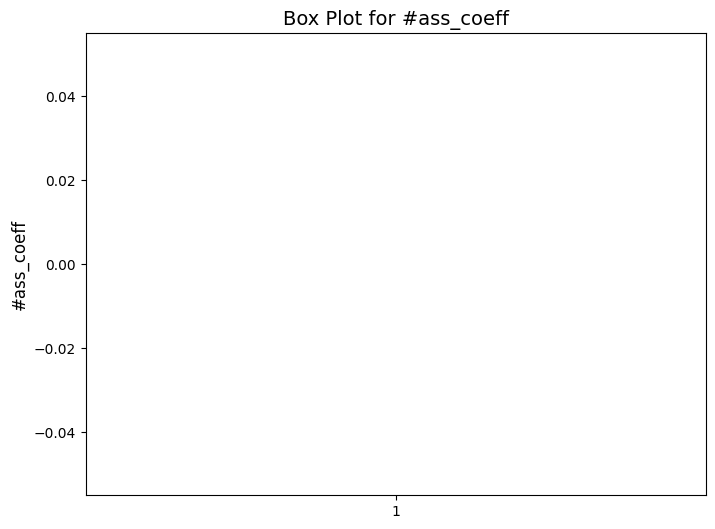

In [41]:
# Finding outliers

# Dados
n = 5000
dim, alpha_a, alpha_g = 1, 3.0, 2.0
path_file = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=' ')

# Coluna que estamos analisando
column = "#ass_coeff"

# Calcular Q1, Q3 e IQR
q1 = np.percentile(df[column], 25)
q3 = np.percentile(df[column], 75)
iqr = q3 - q1

# Limites para outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identificar outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

df_wo_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Exibir outliers
print("Outliers encontrados:")
print(outliers)

# Plotar o box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df[column], vert=True, patch_artist=True, showmeans=True)
plt.title(f"Box Plot for {column}", fontsize=14)
plt.ylabel(column, fontsize=12)
plt.show()

In [42]:
def all_properties_file2(N, dim, alpha_a, alpha_g):
    # Diretório onde os arquivos estão localizados
    path_d = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/prop"
    path_save = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}"
    print(f"N = {N}, dim = {dim}, alpha_a = {alpha_a}, alpha_g = {alpha_g}")
    
    # Arquivos a serem atualizados
    properties_file = os.path.join(path_save, "properties_set.txt")
    filenames_file = os.path.join(path_save, "filenames.txt")
    
    # Verificar se o diretório 'prop' existe
    if not os.path.exists(path_d):
        print(f"O diretório {path_d} não existe. Nada a ser feito.")
        return
    
    # Obter todos os arquivos CSV na pasta prop
    all_files = glob.glob(os.path.join(path_d, "*.csv"))
    
    # Se não houver arquivos na pasta prop, nada é feito
    if not all_files:
        print(f"A pasta {path_d} está vazia. Nada a ser feito.")
        return
    
    # Checar se o arquivo filenames.txt existe, caso contrário criar um
    if os.path.exists(filenames_file):
        with open(filenames_file, 'r') as f:
            filenames_set = set(f.read().splitlines())  # Ler todos os arquivos já processados
    else:
        filenames_set = set()
    
    # Se o arquivo properties_set.txt existir, carregar o dataframe, caso contrário criar um novo
    if os.path.exists(properties_file):
        df = pd.read_csv(properties_file, sep=',')
    else:
        df = pd.DataFrame(columns=["#short_path", "#diamater", "#ass_coeff"])
    
    # Variável para rastrear se houve atualizações
    updated = False
    new_rows = []  # Armazenar novas linhas para adicionar ao dataframe
    
    # Iterar sobre todos os arquivos CSV e verificar se já foram processados
    for file in all_files:
        filename = os.path.basename(file)
        
        # Se o arquivo já foi processado, ignorar
        if filename in filenames_set:
            continue
        
        # Se o arquivo ainda não foi processado, ler os dados e adicionar ao DataFrame
        new_data = pd.read_csv(file)
        new_row = {
            "#short_path": new_data["#mean shortest path"].values[0],
            "#diamater": new_data["# diamater"].values[0],
            "#ass_coeff": new_data["#assortativity coefficient"].values[0]
        }
        new_rows.append(new_row)
        
        # Adicionar o nome do arquivo ao conjunto de arquivos processados
        filenames_set.add(filename)
        updated = True  # Indicar que houve atualizações
        #os.remove(file)  # Opcional: remover o arquivo após processamento
    
    # Se houver atualizações, salvar os arquivos atualizados
    if updated:
        # Adicionar as novas linhas ao dataframe
        df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
        
        # Salvar o dataframe atualizado
        df.to_csv(properties_file, sep=' ', index=False)
        
        # Atualizar o arquivo filenames.txt
        with open(filenames_file, 'w') as f:
            f.write("\n".join(sorted(filenames_set)))  # Escrever os nomes dos arquivos processados
        
        print(f"Arquivos {properties_file} e {filenames_file} atualizados com sucesso.")
    else:
        print("Nenhuma atualização necessária. Todos os arquivos já estavam processados.")

In [43]:
df_5 = filtered_df[filtered_df["N"]==5000]
df_10 = filtered_df[filtered_df["N"]==10000]
df_20 = filtered_df[filtered_df["N"]==20000]
df_40 = filtered_df[filtered_df["N"]==40000]
df_80 = filtered_df[filtered_df["N"]==80000]
df_160 = filtered_df[filtered_df["N"]==160000]
df_320 = filtered_df[filtered_df["N"]==320000]
#N = 10000,  n_s 3200
#N = 20000,  n_s 700
#N = 40000,  n_s 500
#N = 80000,  n_s 200
#N = 160000, n_s 30
#N = 320000, n_s 15

In [44]:
N, dim, alpha_a, alpha_g = 5000, 4, 13.0, 2.0
all_properties_file2(N, dim, alpha_a, alpha_g)
df = pd.read_csv(f"../../data_2/N_5000/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt", sep=' ')
(df["#ass_coeff"].sem()/abs(df["#ass_coeff"].mean()))*100

N = 5000, dim = 4, alpha_a = 13.0, alpha_g = 2.0


KeyboardInterrupt: 

In [ ]:
for _, row in df_5.iterrows():
    row["N"]
    all_properties_file2(5000, int(row["dim"]), row["alpha_a"], row["alpha_g"])

N = 5000, dim = 1, alpha_a = 3.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 2, alpha_a = 7.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 2, alpha_a = 8.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 2, alpha_a = 10.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 4, alpha_a = 10.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 3, alpha_a = 10.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 3, alpha_a = 12.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 4, alpha_a = 12.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 4, 

In [ ]:
for _, row in df_5.iterrows():
    dim = int(row["dim"])
    alpha_a, alpha_g = row["alpha_a"], row["alpha_g"]
    path_file = f"../../data_2/N_5000/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
    df = pd.read_csv(path_file, sep=' ')
    R = df["#ass_coeff"]
    R_per = (R.sem()/abs(R.mean()))*100
    print(f"alpha_a = {alpha_a}, alpha_g = {alpha_g}, dim = {dim}, err = {R_per}")

alpha_a = 3.0, alpha_g = 2.0, dim = 1, err = 9.320414397783992
alpha_a = 7.0, alpha_g = 2.0, dim = 2, err = 2.9438863688573607
alpha_a = 8.0, alpha_g = 2.0, dim = 2, err = 4.495565492150178
alpha_a = 10.0, alpha_g = 2.0, dim = 2, err = 0.9611159020257698
alpha_a = 10.0, alpha_g = 2.0, dim = 4, err = 0.8411392758657993
alpha_a = 10.0, alpha_g = 2.0, dim = 3, err = 1.683563997072225
alpha_a = 12.0, alpha_g = 2.0, dim = 3, err = 134.58201406712678
alpha_a = 12.0, alpha_g = 2.0, dim = 4, err = 3.275025542390691
alpha_a = 13.0, alpha_g = 2.0, dim = 4, err = 63.40276255788959
alpha_a = 14.0, alpha_g = 2.0, dim = 4, err = 4.013172952080792
alpha_a = 14.0, alpha_g = 2.0, dim = 3, err = 2.4706834496739933
alpha_a = 15.0, alpha_g = 2.0, dim = 3, err = 1.7643723446584505
alpha_a = 15.0, alpha_g = 2.0, dim = 4, err = 2.1692431164285466


In [ ]:
n = 40000
dim, alpha_a, alpha_g = 4, 10.0, 2.0
all_properties_file2(n, dim, alpha_a, alpha_g)

N = 40000, dim = 4, alpha_a = 10.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.


R_size: 375
R_in_size: 2
R_out_size: 1
R_ratio: 2.0
R_err: 106.55106763738694
R_mean_before: 0.0015777039999999999
R_mean_after: -1.5539000000000015e-05
R_err_after: 5977.0577257223695


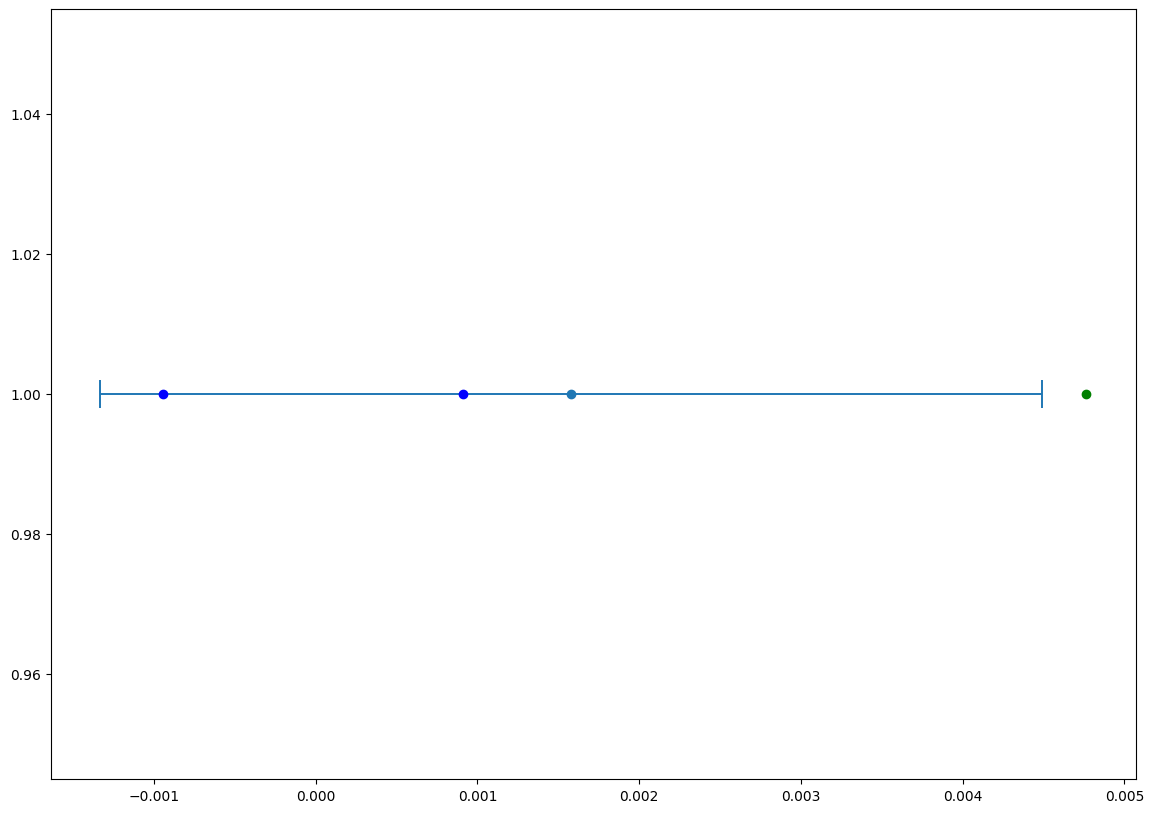

In [ ]:


path_file = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=',')
R = df["#ass_coeff"]
r_mean, r_std, r_err = R.mean(), R.std(), R.sem()
fig, ax = plt.subplots(figsize=(14, 10))

ax.errorbar(r_mean,1,xerr=r_std,marker='o',lw=1.4, capsize=10, capthick=1.4)
R_in = [i for i in R if abs(i-r_mean) <= r_std]
R_out = [i for i in R if abs(i-r_mean) > r_std]

ax.plot(R_in,np.ones(len(R_in)),'o', color='blue')
ax.plot(R_out,np.ones(len(R_out)),'o', color='green')
#ax.plot(R,np.ones(len(R)),'o')
#ax.set_xlim([r_mean - r_err, r_mean + r_err])

std_in = np.std(np.array(R_in), ddof=1)

R_in_err = std_in / np.sqrt(len(R_in))

print("R_size:",len(R))
print("R_in_size:",len(R_in))
print("R_out_size:",len(R_out))
print("R_ratio:",len(R_in)/len(R_out))
print("R_err:", (r_err/abs(r_mean))*100)
print("R_mean_before:", r_mean)
print("R_mean_after:", np.mean(np.array(R_in)))
print("R_err_after:", (R_in_err) / abs(np.mean(R_in))*100 )
plt.show()

      #short_path  #diamater  #ass_coeff  #cod_file
0         11.7527         28    0.019129        NaN
1         13.4390         30    0.004168        NaN
2         12.3138         30    0.013303        NaN
3         16.2477         41   -0.024053        NaN
4         12.4810         29    0.020091        NaN
...           ...        ...         ...        ...
9449      13.3627         35   -0.014539        NaN
9450      13.1298         28   -0.022754        NaN
9451      13.6489         32    0.000687        NaN
9452      13.4012         32   -0.008561        NaN
9453      13.9190         36   -0.011216        NaN

[9454 rows x 4 columns]
N_samples: 9454
R_err = 9.320414397783992 %


/tmp/ipykernel_4198/3122258786.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


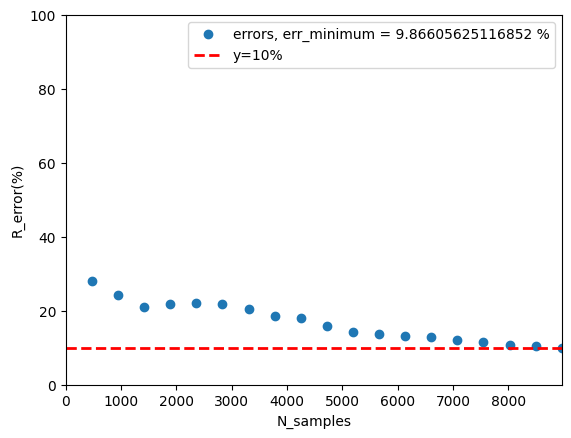

In [ ]:
n, dim, alpha_a, alpha_g = 5000, 1, 3.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, delim_whitespace=True)
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf")
plt.show()

In [ ]:
N, dim, alpha_a, alpha_g = 5000, 3, 12.0, 2.0
all_properties_file2(N, dim, alpha_a, alpha_g)

N = 5000, dim = 3, alpha_a = 12.0, alpha_g = 2.0
Arquivos ../../data_2/N_5000/dim_3/alpha_a_12.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_3/alpha_a_12.0_alpha_g_2.0/filenames.txt atualizados com sucesso.


/tmp/ipykernel_4009/3239913424.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


       #short_path  #diamater  #ass_coeff
0          14.2055         33   -0.050393
1          12.0129         30    0.011558
2          12.4106         29    0.000928
3          11.2310         26    0.014098
4          11.9640         28   -0.033506
...            ...        ...         ...
20136      12.5004         30   -0.018102
20137      12.1913         29    0.001792
20138      12.0981         30   -0.011193
20139      11.6193         31   -0.004394
20140      12.6832         28    0.003067

[20141 rows x 3 columns]
N_samples: 20141
R_err = 0.8411392758657993 %


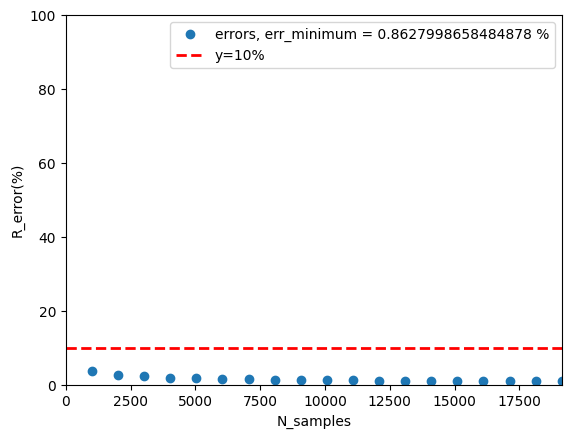

In [ ]:
dim, alpha_a, alpha_g = 4, 10.0, 2.0
file_path = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, sep = ' ')
df
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf")
plt.show()

/tmp/ipykernel_50407/3323762311.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


N_samples: 372
R_err = 25.393170592666742 %


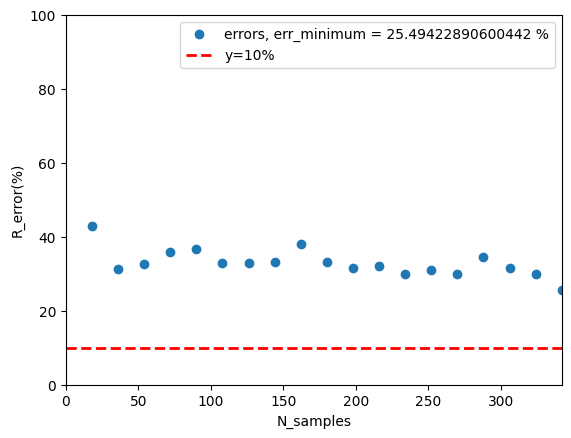

In [ ]:
n, dim, alpha_a, alpha_g = 40000, 4, 10.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, delim_whitespace=True)
R = df["#ass_coeff"]

num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf")
plt.show()

In [ ]:
filtered_df[filtered_df["N"]==10000].reset_index(drop=True)



,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,10000.0,3.0,10.0,2.0,51.0,0.547655,0.557577,71.868793,0.010315,0.970874,2.380476
1,10000.0,4.0,10.0,2.0,51.0,0.557231,0.530440,24.998502,0.012113,0.711656,1.624325
2,10000.0,3.0,11.0,2.0,2287.0,0.101177,0.699022,12.052079,0.010975,0.146924,2.428415
3,10000.0,3.0,12.0,2.0,51.0,0.612416,0.639043,33.761237,0.011159,0.969379,2.398529
4,10000.0,4.0,12.0,2.0,51.0,0.915458,0.912626,509.746922,0.011045,1.170676,2.812995
5,10000.0,3.0,14.0,2.0,51.0,0.777799,0.825723,23.670235,0.013675,1.172566,2.968594
6,10000.0,4.0,14.0,2.0,51.0,0.702636,0.708174,22.767787,0.009675,0.968682,2.333053
7,10000.0,4.0,15.0,2.0,51.0,0.652443,0.654341,29.312199,0.013299,0.955789,2.319398
8,10000.0,3.0,15.0,2.0,51.0,0.604741,0.647900,19.773953,0.012639,1.057979,2.648862


       #short_path  #diamater  #ass_coeff
0          14.1308         30    0.003659
1          13.6079         34   -0.004645
2          13.1941         31    0.003141
3          13.3144         33   -0.010219
4          13.6317         32   -0.013444
...            ...        ...         ...
40806      12.7525         29   -0.014356
40807      13.1718         33    0.014559
40808      13.1680         31   -0.027495
40809      13.1880         33   -0.004659
40810      12.8113         30    0.024594

[40811 rows x 3 columns]
N_samples: 40811
R_err = 135.05844853941974 %


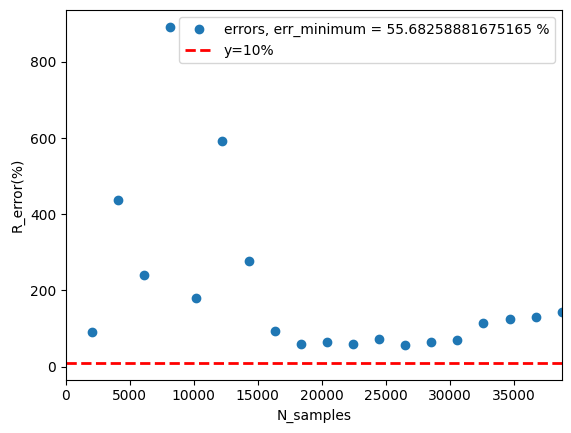

In [ ]:
n, dim, alpha_a, alpha_g = 5000, 3, 12.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, sep=' ')
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
#plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf"')
plt.show()

R_size: 51
σ: 0.011195653034690932
R_mean: 0.04047569607843137
R_in_size: 37
R_out_size: 14
R_ratio: 2.642857142857143
R_err: 3.873200831873877
R_mean_in: 0.040850889189189186
R_err_int: 2.6184743850147605


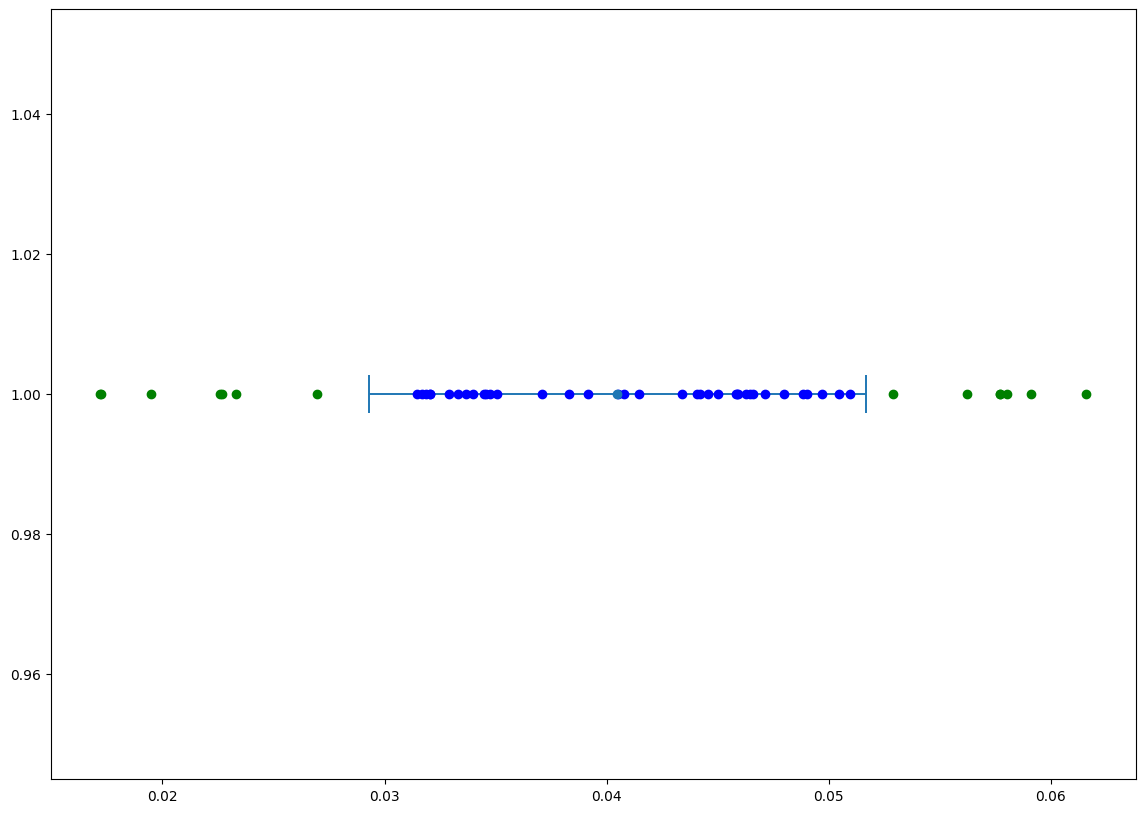

In [ ]:
n = 5000
dim, alpha_a, alpha_g = 1, 8.0, 3.0
path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=',')
R = df["#ass_coeff"]

r_mean, r_std, r_err = R.mean(), R.std(), R.sem()
fig, ax = plt.subplots(figsize=(14, 10))

ax.errorbar(r_mean,1,xerr=r_std,marker='o',lw=1.4, capsize=14 ,capthick=1.4)

R_in = [i for i in R if abs(i-r_mean) <= r_std]
R_out = [i for i in R if abs(i-r_mean) > r_std]

ax.plot(R_in,np.ones(len(R_in)),'o', color='blue')
ax.plot(R_out,np.ones(len(R_out)),'o', color='green')

std_in = np.std(np.array(R_in), ddof=1)

R_in_err = std_in / np.sqrt(len(R_in))

print("R_size:",len(R))
print("σ:", r_std)
print("R_mean:", r_mean)
print("R_in_size:",len(R_in))
print("R_out_size:",len(R_out))
print("R_ratio:",len(R_in)/len(R_out))
print("R_err:", (r_err/abs(r_mean))*100)
print("R_mean_in:", np.mean(np.array(R_in)))

print("R_err_int:", (R_in_err) / abs(np.mean(R_in))*100 )
#ax.set_xlim([r_mean - r_err, r_mean + r_err])
plt.show()

In [ ]:
filtered_df

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
2,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
3,5000.0,1.0,3.0,2.0,1153.0,0.213912,0.984802,23.727713,0.013232,0.308754,3.442902
4,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
...,...,...,...,...,...,...,...,...,...,...,...
69,10000.0,4.0,14.0,2.0,51.0,0.702636,0.708174,22.767787,0.009675,0.968682,2.333053
70,10000.0,4.0,15.0,2.0,51.0,0.652443,0.654341,29.312199,0.013299,0.955789,2.319398
71,10000.0,3.0,15.0,2.0,51.0,0.604741,0.647900,19.773953,0.012639,1.057979,2.648862
72,5000.0,3.0,15.0,2.0,101.0,0.581701,0.792137,17.939215,0.013582,0.832939,2.689473


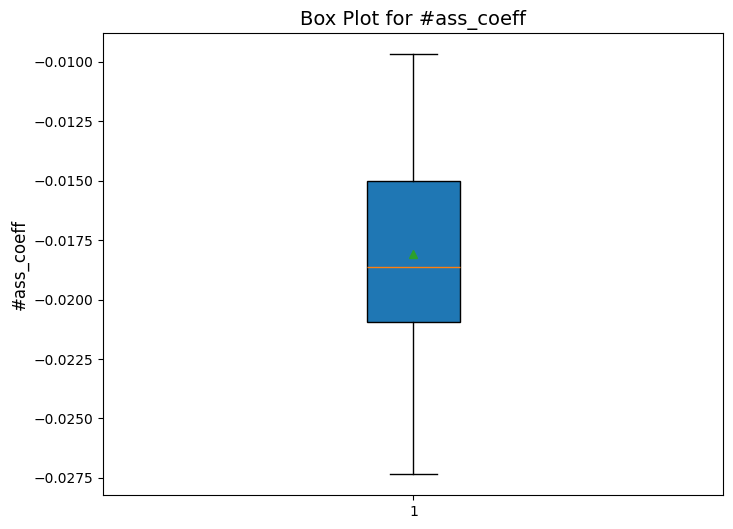

In [ ]:
# box_plot
n=320000
dim = 1
alpha_a, alpha_g = 0.0, 2.0
path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
a = pd.read_csv(path_file, sep=',')

plt.figure(figsize=(8, 6))
plt.boxplot(a["#ass_coeff"], vert=True, patch_artist=True, showmeans=True)
plt.title("Box Plot for #ass_coeff", fontsize=14)
plt.ylabel("#ass_coeff", fontsize=12)
plt.show()

In [66]:
N_f = [5000, 10000, 20000, 40000]

for _, row in filtered_df.iterrows():
    N, dim, alpha_a, alpha_g = int(row["N"]), int(row["dim"]), float(row["alpha_a"]), float(row["alpha_g"])
    if N not in N_f:
        pass
    else:
        #all_properties_file2(N, dim, alpha_a, alpha_g)
        df = pd.read_csv(f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt", sep=' ')
        R = df["#ass_coeff"]
        R_err = abs(R.sem()/R.mean())*100
        if(R_err >= 10):
            print(f"Err:{R_err}, N:{N}, dim:{dim} ,alpha_a: {alpha_a}, alpha_g:{alpha_g}")

Err:19.901372801486453, N:20000, dim:2 ,alpha_a: 6.0, alpha_g:2.0
Err:11.459549527562384, N:40000, dim:3 ,alpha_a: 8.0, alpha_g:2.0
Err:13.488993280405435, N:40000, dim:3 ,alpha_a: 9.0, alpha_g:2.0
Err:31.702165029721414, N:20000, dim:3 ,alpha_a: 9.0, alpha_g:2.0
Err:12.786413774670649, N:20000, dim:4 ,alpha_a: 10.0, alpha_g:2.0
Err:27.246618281219128, N:10000, dim:3 ,alpha_a: 10.0, alpha_g:2.0
Err:10.54882044412851, N:20000, dim:3 ,alpha_a: 10.0, alpha_g:2.0
Err:24.240535207146124, N:40000, dim:4 ,alpha_a: 10.0, alpha_g:2.0
Err:49.10269250874414, N:20000, dim:4 ,alpha_a: 11.0, alpha_g:2.0
Err:15.546452273100789, N:40000, dim:4 ,alpha_a: 11.0, alpha_g:2.0
Err:12.36372914854592, N:20000, dim:4 ,alpha_a: 12.0, alpha_g:2.0
Err:135.05844853941974, N:5000, dim:3 ,alpha_a: 12.0, alpha_g:2.0
Err:21.745021063821607, N:10000, dim:4 ,alpha_a: 12.0, alpha_g:2.0
Err:60.967559231821575, N:5000, dim:4 ,alpha_a: 13.0, alpha_g:2.0


In [ ]:
N = 20000
dim = [2, 3, 4, 3, 4, 4]
alpha_a = [6.0, 9.0, 10.0, 10.0, 11.0, 12.0]
alpha_g = 2.0

     #short_path  #diamater  #ass_coeff
0        15.9340         39   -0.003165
1        16.4427         41   -0.002603
2        16.0665         40   -0.000693
3        16.0711         40    0.003224
4        16.6337         41    0.004401
..           ...        ...         ...
500      16.5684         40   -0.008664
501      16.1779         40    0.000608
502      16.3075         40    0.005417
503      16.2347         39   -0.011448
504      16.1637         40   -0.005305

[505 rows x 3 columns]
N_samples: 505
R_err = 11.459549527562384 %


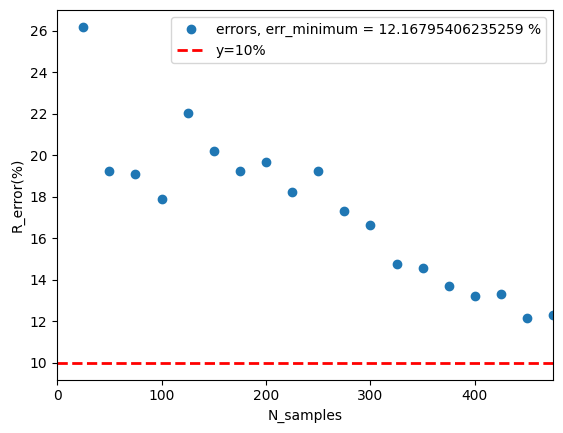

In [69]:
n, dim, alpha_a, alpha_g = 40000, 3, 8.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, sep=' ')
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
#plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf"')
plt.show()